#Project12- To perform EDA and to predict whether a person will get loan or not depending on various features.

In [1]:
#Importing some neccessary libraries# Checking datatypes of each variables
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_loan=pd.read_csv('loan_prediction.csv')
df_loan         

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Checking for data types
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Checking for null values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that there are lots of null/missing values in our data set, we need to deal with these missing values to make our data clean

In [8]:
#Removing all the rows with null/missing values
df_loan.dropna(axis=0,inplace=True)

In [10]:
#Again checking for null values
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that all the null values are now removed

In [12]:
#Checking description of dataset
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


--Performing EDA for the above data to get insight of data--

In [13]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

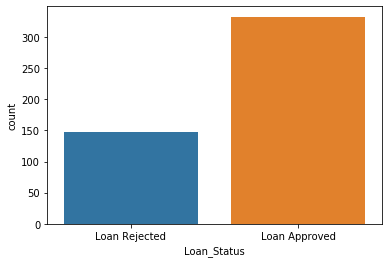

Loan Approved    0.691667
Loan Rejected    0.308333
Name: Loan_Status, dtype: float64

In [33]:
loan=df_loan['Loan_Status'].apply(lambda x:'Loan Approved' if x=='Y' else 'Loan Rejected')
sns.countplot(loan)
plt.show()
loan.value_counts(normalize=True)

We can see that approx 70% loans are approved and only 30% are rejected

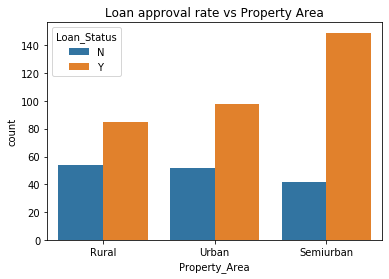

In [19]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df_loan)
plt.title('Loan approval rate vs Property Area')
plt.show()

We can see that maximum loan approval rate is in SemiUrban area where as minimum approval rate in Rural area

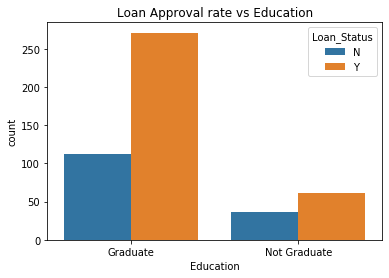

In [21]:
sns.countplot(x='Education',hue='Loan_Status',data=df_loan)
plt.title('Loan Approval rate vs Education')
plt.show()

We can see that loan approval rate is high amoung Graduates as compared to non graduate applicants

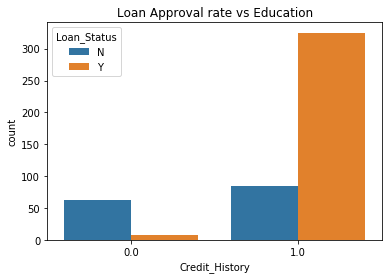

In [38]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df_loan)
plt.title('Loan Approval rate vs Education')
plt.show()

We can see that loan approval rate is high for person with good credit history

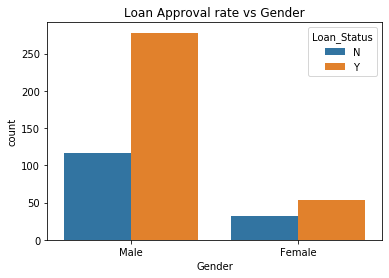

In [22]:
sns.countplot(x='Gender',hue='Loan_Status',data=df_loan)
plt.title('Loan Approval rate vs Gender')
plt.show()

We can see that loan approval rate is high amoung Males as compared to Females applicants

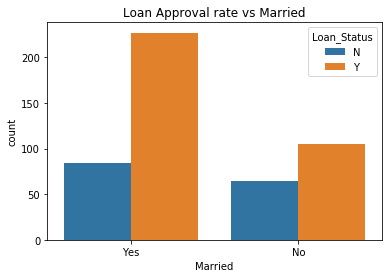

In [23]:
sns.countplot(x='Married',hue='Loan_Status',data=df_loan)
plt.title('Loan Approval rate vs Married')
plt.show()

We can see that loan approval rate is high amoung married as compared to Females single/non-married



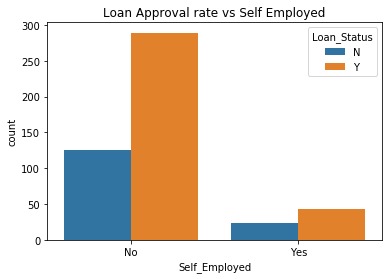

In [25]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df_loan)
plt.title('Loan Approval rate vs Self Employed')
plt.show()

We can see that loan approval rate is high amoung people who are not self employed as compared to who are self employed



In [28]:
def Kdeplot(x):
    fig = plt.figure(figsize=(10,4))
    ax=sns.kdeplot(df_loan.loc[(df_loan['Loan_Status'] == 'N'),x] , color='r',shade=True, label='Loan Rejected') 
    ax=sns.kdeplot(df_loan.loc[(df_loan['Loan_Status'] == 'Y'),x] , color='g',shade=True, label='Loan Aprroved')
    plt.title('Loan Approval status with respect to {}'.format(x))

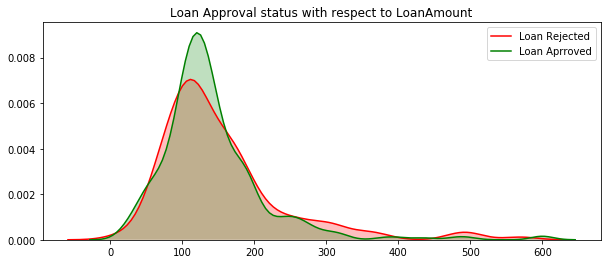

In [34]:
Kdeplot('LoanAmount')

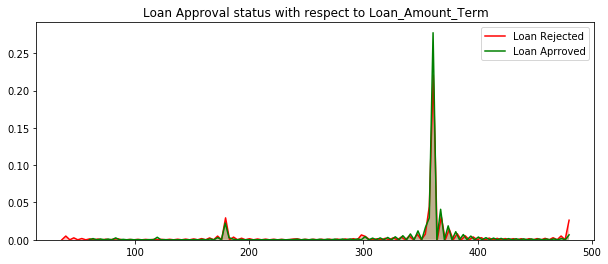

In [35]:
Kdeplot('Loan_Amount_Term')

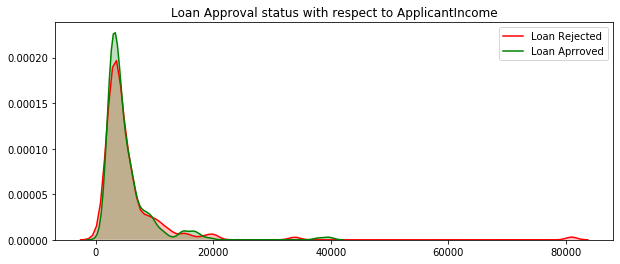

In [36]:
Kdeplot('ApplicantIncome')

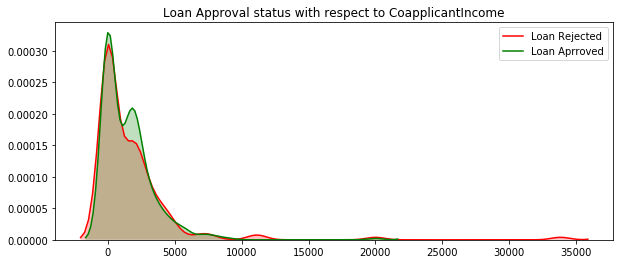

In [37]:
Kdeplot('CoapplicantIncome')

We can see that there is similar density for these parameters in terms of loan approved or rejected, it means these
parameters have less influence on loan approval rate

As we know we have multiple columns variable whic have object data type, we have to encode them using lable Encoder to train our model

In [64]:
#Using Label Encoder to encode the variables
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()
col=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for val in col:
    df_loan[val]=LE.fit_transform(df_loan[val].astype(str))

In [44]:
# We can drop LoanID as it has no impact/realtion with loan status
df_loan.drop('Loan_ID',axis=1,inplace=True)

In [65]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [67]:
df_loan.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We can see that we have now all the data in int/float format which is required to train our model

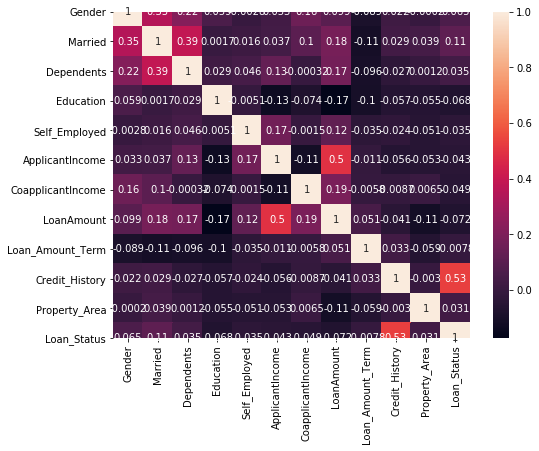

In [66]:
#Checking correlation 
plt.figure(figsize=(8,6))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

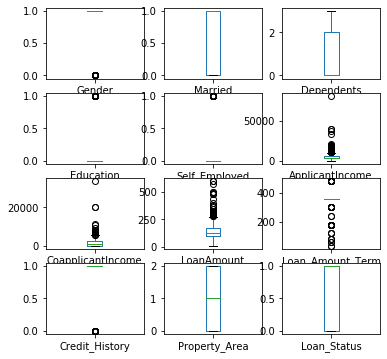

In [68]:
#Checking for outliers
df_loan.plot(kind='box',subplots=True,layout=(4,3),figsize=(6,6))
plt.show

We can see that there are outliers which have to be removed

In [69]:
#Removing outliers using z score
from scipy.stats import zscore
z_score=np.abs(zscore(df_loan))
z_score

array([[0.46719815, 0.73716237, 0.21859918, ..., 0.41319694, 1.31886834,
        1.49774605],
       [0.46719815, 0.73716237, 0.76203265, ..., 0.41319694, 1.25977445,
        0.66766993],
       [0.46719815, 0.73716237, 0.76203265, ..., 0.41319694, 1.25977445,
        0.66766993],
       ...,
       [0.46719815, 0.73716237, 0.21859918, ..., 0.41319694, 1.25977445,
        0.66766993],
       [0.46719815, 0.73716237, 1.19923101, ..., 0.41319694, 1.25977445,
        0.66766993],
       [2.14041943, 1.35655324, 0.76203265, ..., 2.42015348, 0.02954695,
        1.49774605]])

In [70]:
print(df_loan.shape)
loan=df_loan[(z_score<3).all(axis=1)]
loan.shape

(480, 12)


(452, 12)

We can see that outliers are removed

In [71]:
#Separating the input and ouput variable
df_x=loan.drop(columns=['Loan_Status'])
y=loan['Loan_Status']

In [74]:
#Checking for skewness
print(df_x.skew())
print('Total no. of features are: ', len(df_x.skew()) )
print('No. of Skewed features are: ', len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Gender              -1.658936
Married             -0.602600
Dependents           0.973964
Education            1.443921
Self_Employed        2.200742
ApplicantIncome      1.980989
CoapplicantIncome    1.405169
LoanAmount           1.064924
Loan_Amount_Term    -2.010659
Credit_History      -1.986572
Property_Area       -0.038700
dtype: float64
Total no. of features are:  11
No. of Skewed features are:  10


In [75]:
# Removing Skewness
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])


In [76]:
#Again Checking for skewness
print(df_x.skew())
print('Total no of features are : ', len(df_x.skew()))
print('No of skewed features are : ',len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Gender              -1.658936
Married             -0.602600
Dependents           0.646236
Education            1.443921
Self_Employed        2.200742
ApplicantIncome     -0.047691
CoapplicantIncome   -0.182401
LoanAmount          -0.205289
Loan_Amount_Term    -0.873633
Credit_History      -1.986572
Property_Area       -0.038700
dtype: float64
Total no of features are :  11
No of skewed features are :  7


In [77]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [79]:
#Again Checking for skewness after Scaling
print(x.skew())
print("Total features: ",len(x.skew()))
print("Skewed features: ",len(x.skew().loc[abs(x.skew())>0.5]))

Gender              -1.658936
Married             -0.602600
Dependents           0.646236
Education            1.443921
Self_Employed        2.200742
ApplicantIncome     -0.047691
CoapplicantIncome   -0.182401
LoanAmount          -0.205289
Loan_Amount_Term    -0.873633
Credit_History      -1.986572
Property_Area       -0.038700
dtype: float64
Total features:  11
Skewed features:  7


In [80]:
#Importing various neccessary parameters/fetures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [81]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(train_x,train_y)
        y_pred=tec.predict(test_x)
        temp=f1_score(test_y,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [83]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,random_state=42,stratify=y)

Checking for best F1 score and random states for various techniques

In [84]:
LR=LogisticRegression()
maxf1_score(LR,x,y)

Maximum f1_score is:  0.9197080291970804 at random state :  57


In [85]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)

Maximum f1_score is:  0.8823529411764706 at random state :  64


In [86]:
KN=KNeighborsClassifier()
maxf1_score(KN,x,y)

Maximum f1_score is:  0.9037037037037037 at random state :  60


In [87]:
SV=SVC()
maxf1_score(SV,x,y)

Maximum f1_score is:  0.9208633093525179 at random state :  92


In [88]:
RF=RandomForestClassifier()
maxf1_score(RF,x,y)

Maximum f1_score is:  0.8970588235294118 at random state :  53


In [89]:
GN=GaussianNB()
maxf1_score(GN,x,y)

Maximum f1_score is:  0.9208633093525179 at random state :  92


In [90]:
#Using Grid search CV for best parameters
from sklearn.model_selection import GridSearchCV
SV=SVC()
parameters = {'C': [0.1, 1],  
              'gamma': [1, 0.1], 
              'kernel': ['rbf','linear','poly']} 
clf = GridSearchCV(SV, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [91]:
SV1=SVC(C=1,gamma=0.1,kernel='rbf')
maxf1_score(SV1,x,y)

Maximum f1_score is:  0.9208633093525179 at random state :  92


We can see that we are getting best f1 score using SVC , let's check for other scores as well for each techniques

In [92]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV1))
models.append(('KNeighborsClassifier',KN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  0.8131868131868132


Cross Value Score =  0.6950592885375494


roc_auc_score =  0.7708333333333335


Classification_report 
               precision    recall  f1-score   support

           0       0.69      0.67      0.68        27
           1       0.86      0.88      0.87        64

    accuracy                           0.81        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.81      0.81      0.81        91



[[18  9]
 [ 8 56]]


AxesSubplot(0.125,0.808774;0.62x0.0712264

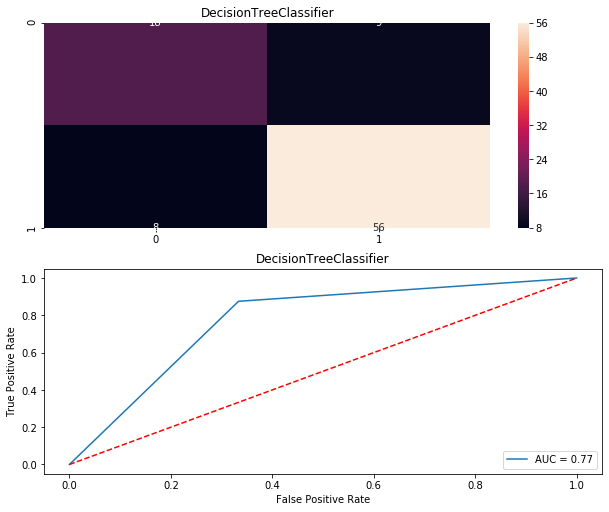

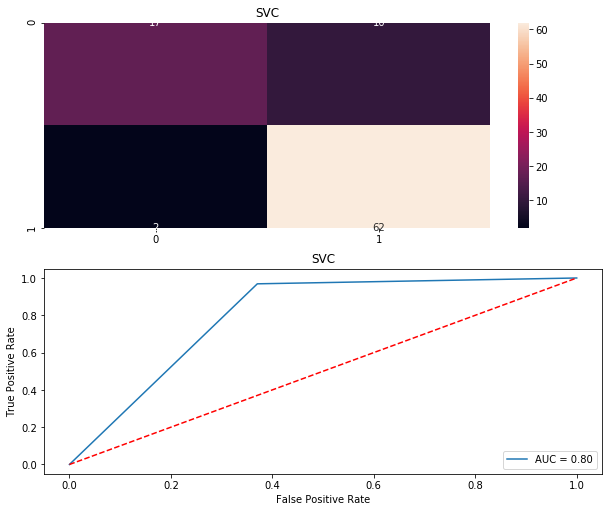

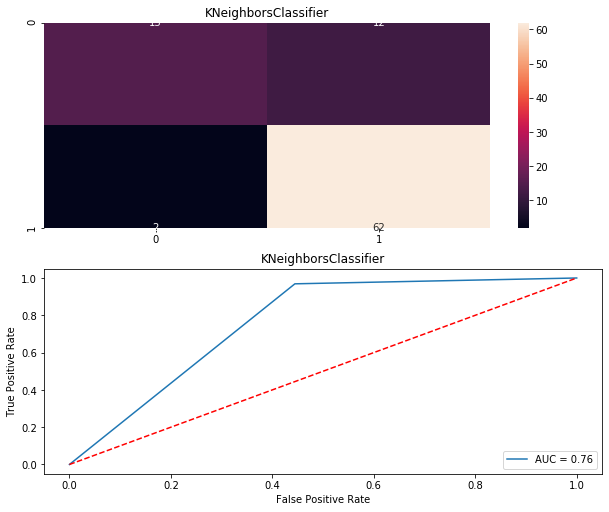

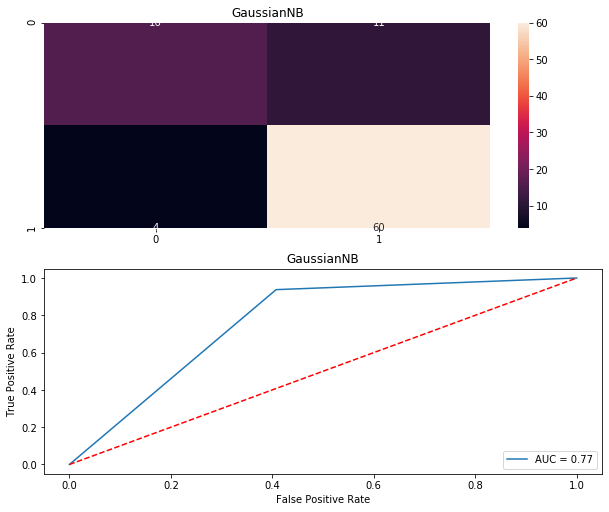

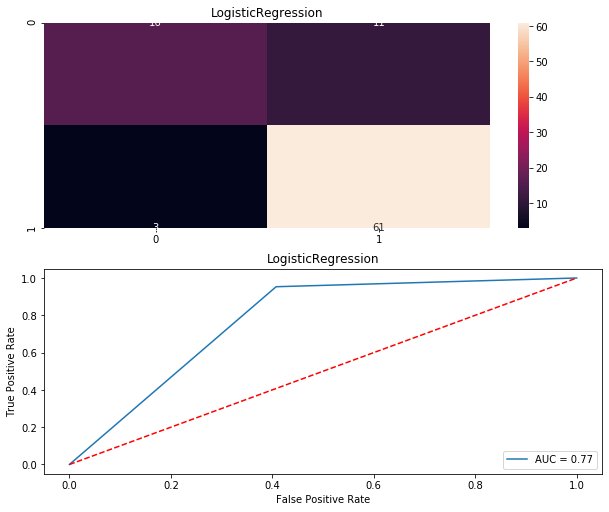

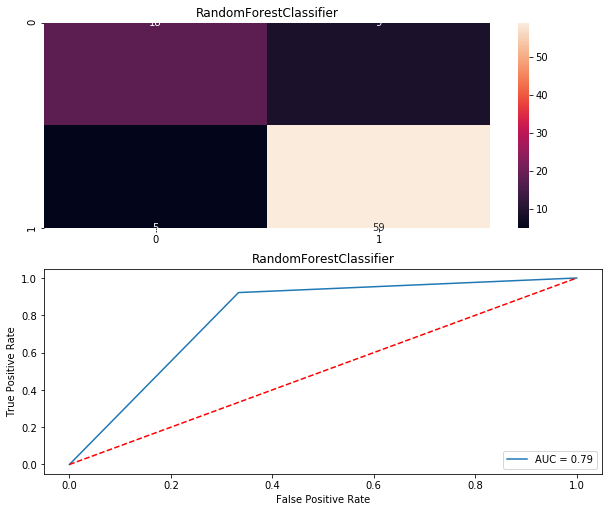

In [93]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [94]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,81.318681,69.505929,77.083333
1,SVC,86.813187,82.371542,79.918981
2,KNeighborsClassifier,84.615385,79.466403,76.215278
3,GaussianNB,83.516484,81.007905,76.504630
4,LogisticRegression,84.615385,82.144269,77.285880
5,RandomForestClassifier,84.615385,77.895257,79.427083


We can see that we are getting almost equal accuracy with SVC , we can save our final model now

In [95]:
# Saving our final model using Joblib
from sklearn.externals import joblib 
  

joblib.dump(SV, 'SV_Loan-Prediction.pkl')

['SV_Loan-Prediction.pkl']

**This is the best and final model we have saved**